<a href="https://colab.research.google.com/github/CesarAguilardL/Proyectos-Analisis-de-Datos/blob/proyecto-3/Copia_de_Tarea_Redes_Neuronales_ejercicio_2(ajustado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
# Cargar el conjunto de datos
data = pd.read_csv('creditcard.csv')

# Explorar los datos
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

0    284315
1       492
Name: Class, dtype: int64


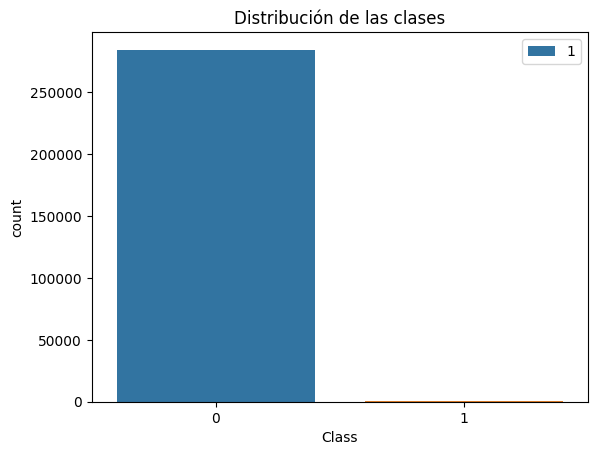

In [ ]:
# Verificar la distribución de las clases
print(data['Class'].value_counts())

# Graficar la distribución de las clases
sns.countplot(data=data, x='Class')
plt.title('Distribución de las clases')
plt.legend('1 en caso de fraude y 0 en caso contrario')
plt.show()

#Por el desbalance de los datos creamos un nuevo data frame para que el entrenamiento se mas efectivo

In [ ]:
count_ones = data[data['Class'] == 1].shape[0]
print("Cantidad de filas con valor 1 en la columna 'class':", count_ones)
count_ceros = data[data['Class'] == 0].shape[0]
print("Cantidad de filas con valor 0 en la columna 'class':", count_ceros)

Cantidad de filas con valor 1 en la columna 'class': 492
Cantidad de filas con valor 0 en la columna 'class': 284315


In [ ]:
import pandas as pd

# Contar la cantidad de filas para cada clase
count_class_0 = data[data['Class'] == 0].shape[0]
count_class_1 = data[data['Class'] == 1].shape[0]

# Obtener el mínimo entre las dos cantidades
min_count = min(count_class_0, count_class_1)

# Muestrear filas aleatorias para cada clase hasta alcanzar el mínimo
data_class_0 = data[data['Class'] == 0].sample(n=min_count, random_state=42)
data_class_1 = data[data['Class'] == 1].sample(n=min_count, random_state=42)

# Concatenar los dos DataFrames resultantes
balanced_data = pd.concat([data_class_0, data_class_1])

# Opcional: reordenar las filas de forma aleatoria
balanced_data = balanced_data.sample(frac=1, random_state=42)

In [ ]:
balanced_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10891,18675.0,-12.339603,4.488267,-16.587073,10.107274,-10.420199,0.130670,-15.600323,-1.157696,-5.304631,...,-2.089610,1.745315,1.376816,-0.554271,-1.610741,0.153725,1.212477,-1.869290,188.78,1
1686,1308.0,-1.379848,0.536720,2.647870,1.408111,0.126442,0.986525,0.960251,-0.629717,1.729173,...,-0.666874,-0.343574,0.022138,0.093532,0.011293,-0.503395,-0.438189,-0.346731,43.80,0
251881,155542.0,1.868226,1.363077,-1.994934,4.173516,1.239751,-0.746186,0.572731,-0.131235,-1.551839,...,-0.301001,-0.818972,0.206812,-0.263683,-0.114958,-0.240672,-0.006629,0.017258,3.14,1
128360,78685.0,-0.671155,1.183971,0.793623,-0.218410,0.357282,-0.023707,0.363563,0.463983,-0.704518,...,-0.083474,-0.352537,-0.092199,-0.764804,-0.292712,0.185362,-0.028254,0.055953,1.30,0
20746,31244.0,1.087002,0.065459,0.485043,1.343874,-0.283361,0.002520,-0.076665,0.165384,0.151865,...,-0.040723,0.016005,-0.048042,0.208209,0.571482,-0.340377,0.028643,0.007649,18.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35123,37976.0,-2.045484,-0.603428,-0.386028,-3.278179,0.840525,3.868593,0.785816,1.183953,1.009150,...,0.147327,0.243740,-0.357663,1.052686,1.112681,-0.749815,-0.005714,-0.173156,350.00,0
84735,60439.0,-0.377304,0.572787,1.333869,-0.000070,0.304511,-0.084981,0.497673,0.022442,0.100338,...,-0.023137,0.118389,-0.270359,-0.393864,-0.062653,0.510585,0.094780,0.126249,12.95,0
149577,91502.0,0.007379,2.365183,-2.600287,1.111602,3.276441,-1.776141,2.114531,-0.830084,0.900490,...,-0.563944,-0.902100,-0.404382,-0.012944,0.589836,-0.734449,-0.447529,-0.362375,1.00,1
175852,122517.0,1.554783,-1.059409,-0.658570,0.112271,-0.724124,-0.288185,-0.241162,-0.044019,0.879991,...,0.021068,-0.344273,0.131801,-0.336523,-0.569150,-0.302588,-0.035571,-0.008578,229.88,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir características y etiquetas
X = balanced_data.drop('Class', axis=1)
y = balanced_data['Class']

# Escalar características
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
len(X_train)

885

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Construcción del modelo
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='tanh')) #capas de entrada
model.add(Dense(8, activation='relu')) #capas oculta
model.add(Dense(1, activation='sigmoid')) #salida

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#mse

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
28/28 [==============================] - 1s 2ms/step - loss: 0.6008 - accuracy: 0.6949
Epoch 2/10
28/28 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8610
Epoch 3/10
28/28 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8870
Epoch 4/10
28/28 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.9017
Epoch 5/10
28/28 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.9153
Epoch 6/10
28/28 [==============================] - 0s 1ms/step - loss: 0.2251 - accuracy: 0.9277
Epoch 7/10
28/28 [==============================] - 0s 1ms/step - loss: 0.2046 - accuracy: 0.9401
Epoch 8/10
28/28 [==============================] - 0s 1ms/step - loss: 0.1886 - accuracy: 0.9412
Epoch 9/10
28/28 [==============================] - 0s 1ms/step - loss: 0.1765 - accuracy: 0.9446
Epoch 10/10
28/28 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 0.9469


In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9293


[0.19105438888072968, 0.9292929172515869]

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,265
Trainable params: 1,265
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluación del modelo con los datos de prueba
# Evaluar el modelo en el conjunto de prueba
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 92.93%
